In [1]:
import pandas as pd
import numpy as np
from fancyimpute import  IterativeImputer

In [2]:
import sys
sys.path.append('../../MyModule/')
from StatAnalyzer import StatAnalyzer
from MissingDataPlotter import MissingDataPlotter
from OutlierRemover import OutlierRemover
from FeaturePlotter import FeaturePlotter
from DataImputer import DataImputer

In [3]:
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')
pd.options.display.max_rows = 97
pd.options.display.max_columns = 97

In [4]:
sa = StatAnalyzer(train_df, 'SalePrice')
mp = MissingDataPlotter(train_df, 'SalePrice')
data_imputer = DataImputer()

In [5]:
sa.table_diagnose()

Rows  Columns  Numeric  Object
Count  1460       81       38      43

columns n null n unique    types  \
0              Id      0     1460    int64   
1      MSSubClass      0       15    int64   
2        MSZoning      0        5   object   
3     LotFrontage    259      110  float64   
4         LotArea      0     1073    int64   
5          Street      0        2   object   
6           Alley   1369        2   object   
7        LotShape      0        4   object   
8     LandContour      0        4   object   
9       Utilities      0        2   object   
10      LotConfig      0        5   object   
11      LandSlope      0        3   object   
12   Neighborhood      0       25   object   
13     Condition1      0        9   object   
14     Condition2      0        8   object   
15       BldgType      0        5   object   
16     HouseStyle      0        8   object   
17    OverallQual      0       10    int64   
18    OverallCond      0        9    int64   
19      YearBuilt      0      112    int64   
20   YearRemodAdd      0       61    int64   
21      RoofStyle      0        6   object   
22       RoofMatl      0        8   object   
23    Exterior1st      0       15   object   
24    Exterior2nd      0       16   object   
25     MasVnrType      8        4   object   
26     MasVnrArea      8      327  float64   
27      ExterQual      0        4   object   
28      ExterCond      0        5   object   
29     Foundation      0        6   object   
30       BsmtQual     37        4   object   
31       BsmtCond     37        4   object   
32   BsmtExposure     38        4   object   
33   BsmtFinType1     37        6   object   
34     BsmtFinSF1      0      637    int64   
35   BsmtFinType2     38        6   object   
36     BsmtFinSF2      0      144    int64   
37      BsmtUnfSF      0      780    int64   
38    TotalBsmtSF      0      721    int64   
39        Heating      0        6   object   
40      HeatingQC      0        5   object   
41     CentralAir      0        2   object   
42     Electrical      1        5   object   
43       1stFlrSF      0      753    int64   
44       2ndFlrSF      0      417    int64   
45   LowQualFinSF      0       24    int64   
46      GrLivArea      0      861    int64   
47   BsmtFullBath      0        4    int64   
48   BsmtHalfBath      0        3    int64   
49       FullBath      0        4    int64   
50       HalfBath      0        3    int64   
51   BedroomAbvGr      0        8    int64   
52   KitchenAbvGr      0        4    int64   
53    KitchenQual      0        4   object   
54   TotRmsAbvGrd      0       12    int64   
55     Functional      0        7   object   
56     Fireplaces      0        4    int64   
57    FireplaceQu    690        5   object   
58     GarageType     81        6   object   
59    GarageYrBlt     81       97  float64   
60   GarageFinish     81        3   object   
61     GarageCars      0        5    int64   
62     GarageArea      0      441    int64   
63     GarageQual     81        5   object   
64     GarageCond     81        5   object   
65     PavedDrive      0        3   object   
66     WoodDeckSF      0      274    int64   
67    OpenPorchSF      0      202    int64   
68  EnclosedPorch      0      120    int64   
69      3SsnPorch      0       20    int64   
70    ScreenPorch      0       76    int64   
71       PoolArea      0        8    int64   
72         PoolQC   1453        3   object   
73          Fence   1179        4   object   
74    MiscFeature   1406        4   object   
75        MiscVal      0       21    int64   
76         MoSold      0       12    int64   
77         YrSold      0        5    int64   
78       SaleType      0        9   object   
79  SaleCondition      0        6   object   
80      SalePrice      0      663    int64   

                                          unique vals percentages null (%)  \
0                                                 NaN                  0.0   
1                                                 NaN                  0.0   
2  

<Figure size 640x480 with 0 Axes>

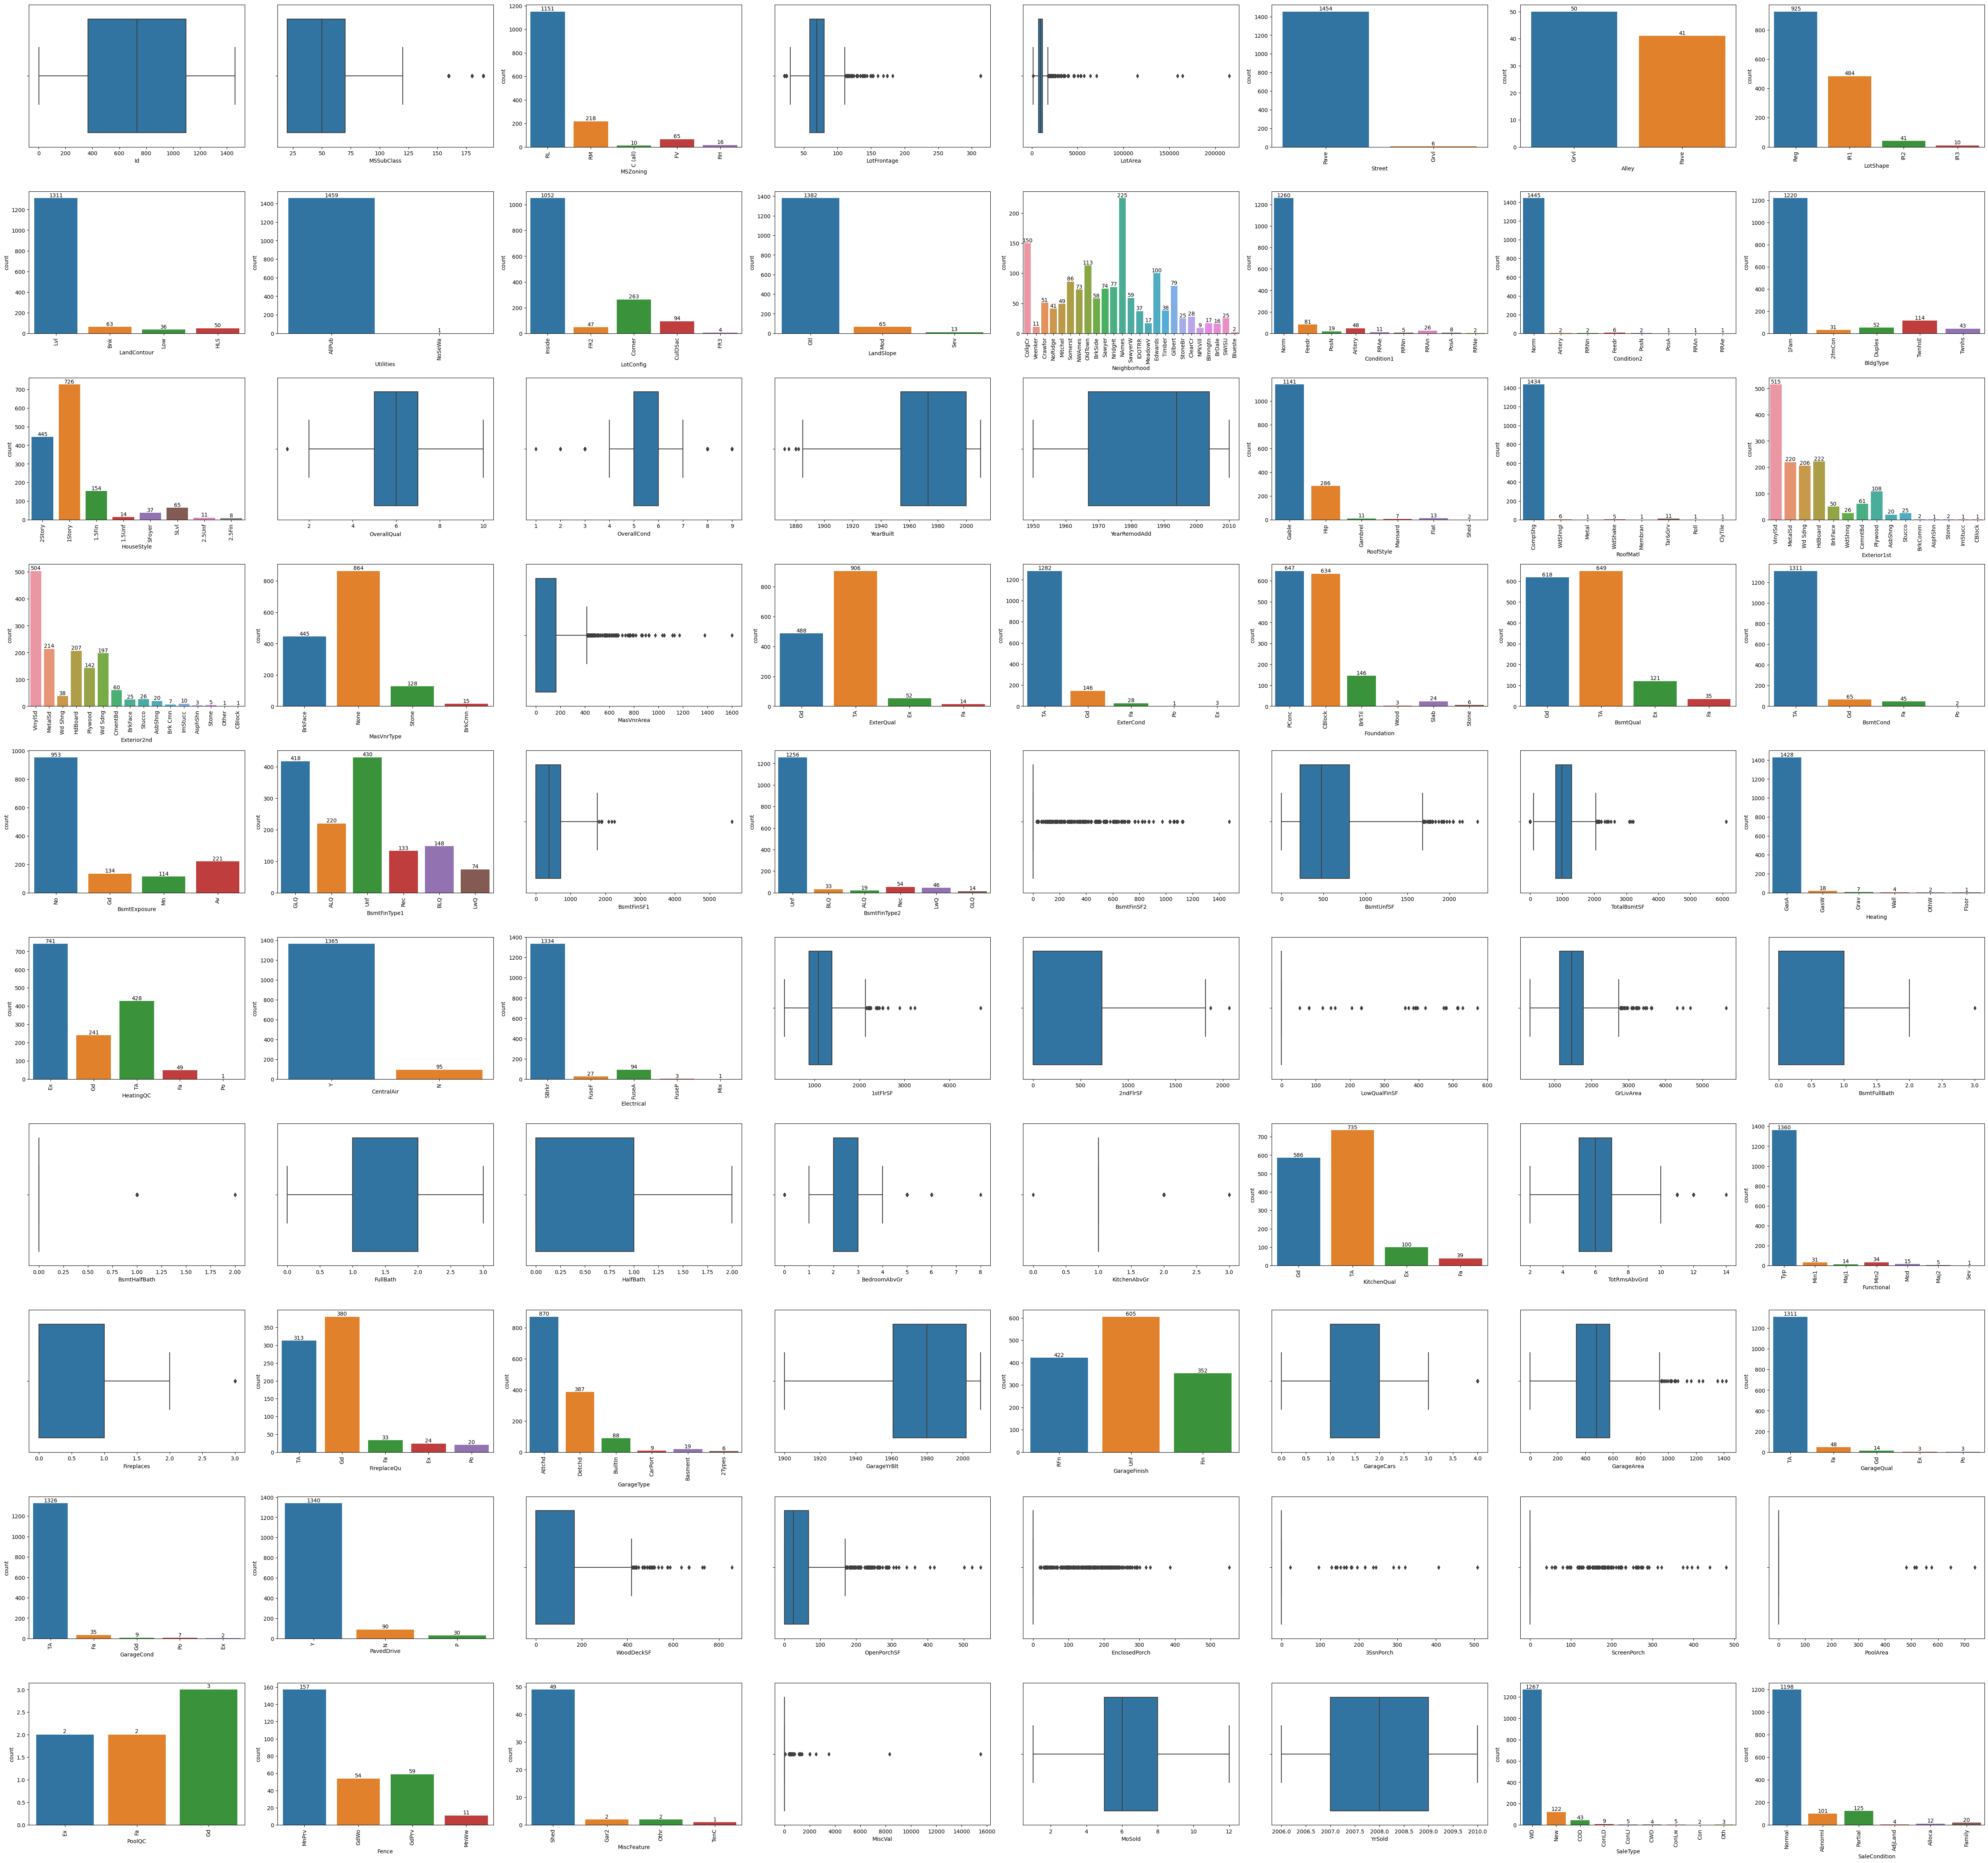

In [6]:
### plot outliers -> kebutuhan analisis
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']
fp = FeaturePlotter(data=train_df, feature_columns=X.columns)
fp.plot_features(plot_type='boxplot')

In [7]:
Or = OutlierRemover(train_df)
Or.get_outliers('SalePrice')

Original DataFrame


MSSubClass      SalePrice  LotFrontage      SalePrice        LotArea  \
count  1460.000000    1460.000000  1201.000000    1460.000000    1460.000000   
mean     56.897260  180921.195890    70.049958  180921.195890   10516.828082   
std      42.300571   79442.502883    24.284752   79442.502883    9981.264932   
min      20.000000   34900.000000    21.000000   34900.000000    1300.000000   
25%      20.000000  129975.000000    59.000000  129975.000000    7553.500000   
50%      50.000000  163000.000000    69.000000  163000.000000    9478.500000   
75%      70.000000  214000.000000    80.000000  214000.000000   11601.500000   
max     190.000000  755000.000000   313.000000  755000.000000  215245.000000   

           SalePrice  OverallQual      SalePrice  OverallCond      SalePrice  \
count    1460.000000  1460.000000    1460.000000  1460.000000    1460.000000   
mean   180921.195890     6.099315  180921.195890     5.575342  180921.195890   
std     79442.502883     1.382997   79442.502883     1.112799   79442.502883   
min     34900.000000     1.000000   34900.000000     1.000000   34900.000000   
25%    129975.000000     5.000000  129975.000000     5.000000  129975.000000   
50%    163000.000000     6.000000  163000.000000     5.000000  163000.000000   
75%    214000.000000     7.000000  214000.000000     6.000000  214000.000000   
max    755000.000000    10.000000  755000.000000     9.000000  755000.000000   

         YearBuilt      SalePrice   MasVnrArea      SalePrice   BsmtFinSF1  \
count  1460.000000    1460.000000  1452.000000    1460.000000  1460.000000   
mean   1971.267808  180921.195890   103.685262  180921.195890   443.639726   
std      30.202904   79442.502883   181.066207   79442.502883   456.098091   
min    1872.000000   34900.000000     0.000000   34900.000000     0.000000   
25%    1954.000000  129975.000000     0.000000  129975.000000     0.000000   
50%    1973.000000  163000.000000     0.000000  163000.000000   383.500000   
75%    2000.000000  214000.000000   166.000000  214000.000000   712.250000   
max    2010.000000  755000.000000  1600.000000  755000.000000  5644.000000   

           SalePrice   BsmtFinSF2      SalePrice    BsmtUnfSF      SalePrice  \
count    1460.000000  1460.000000    1460.000000  1460.000000    1460.000000   
mean   180921.195890    46.549315  180921.195890   567.240411  180921.195890   
std     79442.502883   161.319273   79442.502883   441.866955   79442.502883   
min     34900.000000     0.000000   34900.000000     0.000000   34900.000000   
25%    129975.000000     0.000000  129975.000000   223.000000  129975.000000   
50%    163000.000000     0.000000  163000.000000   477.500000  163000.000000   
75%    214000.000000     0.000000  214000.000000   808.000000  214000.000000   
max    755000.000000  1474.000000  755000.000000  2336.000000  755000.000000   

       TotalBsmtSF      SalePrice     1stFlrSF      SalePrice     2ndFlrSF  \
count  1460.000000    1460.000000  1460.000000    1460.000000  1460.000000   
mean   1057.429452  180921.195890  1162.626712  180921.195890   346.992466   
std     438.705324   79442.502883   386.587738   79442.502883   436.528436   
min       0.000000   34900.000000   334.000000   34900.000000     0.000000   
25%     795.750000  129975.000000   882.000000  129975.000000     0.000000   
50%     991.500000  163000.000000  1087.000000  163000.000000     0.000000   
75%    1298.250000  214000.000000  1391.250000  214000.000000   728.000000   
max    6110.000000  755000.000000  4692.000000  755000.000000  2065.000000   

           SalePrice  LowQualFinSF      SalePrice    GrLivArea      SalePrice  \
count    1460.000000   1460.000000    1460.000000  1460.000000    1460.000000   
mean   180921.195890      5.844521  180921.195890  1515.463699  180921.195890   
std     79442.502883     48.623081   79442.502883   525.480383   79442.502883   
min     34900.000000      0.000000   34900.000000   334.000000   34900.000000   
25%    129975.000000      0.000000

Outliers DataFrame


MSSubClass      SalePrice  LotFrontage      SalePrice        LotArea  \
count  103.000000     103.000000    88.000000     347.000000      69.000000   
mean   170.679612  132487.233010    83.897727  179727.100865   35601.014493   
std     13.738606   35722.541574    66.174454   73183.793139   35475.698864   
min    160.000000   55000.000000    21.000000   52500.000000    1300.000000   
25%    160.000000  106000.000000    21.000000  137500.000000   20544.000000   
50%    160.000000  131500.000000   114.000000  168500.000000   23595.000000   
75%    190.000000  156000.000000   129.000000  214250.000000   35133.000000   
max    190.000000  239000.000000   313.000000  745000.000000  215245.000000   

           SalePrice  OverallQual     SalePrice  OverallCond      SalePrice  \
count      69.000000          2.0      2.000000   125.000000     125.000000   
mean   237063.231884          1.0  50150.000000     6.880000  154225.536000   
std    120942.389350          0.0  15344.217152     2.408319   74073.978254   
min     80000.000000          1.0  39300.000000     1.000000   35311.000000   
25%    168000.000000          1.0  44725.000000     8.000000  110000.000000   
50%    200624.000000          1.0  50150.000000     8.000000  140000.000000   
75%    262500.000000          1.0  55575.000000     8.000000  174000.000000   
max    755000.000000          1.0  61000.000000     9.000000  475000.000000   

         YearBuilt      SalePrice   MasVnrArea      SalePrice   BsmtFinSF1  \
count     7.000000       7.000000    96.000000     104.000000     7.000000   
mean   1878.428571  169497.000000   619.083333  282184.548077  2540.285714   
std       3.552330   79363.559415   222.296136  124689.355520  1378.843200   
min    1872.000000   94000.000000   420.000000   89471.000000  1810.000000   
25%    1877.500000  119750.000000   456.000000  184862.500000  1892.000000   
50%    1880.000000  124000.000000   563.000000  257150.000000  2096.000000   
75%    1880.000000  216989.500000   681.000000  363262.750000  2224.000000   
max    1882.000000  295000.000000  1600.000000  755000.000000  5644.000000   

           SalePrice   BsmtFinSF2      SalePrice    BsmtUnfSF      SalePrice  \
count       7.000000   167.000000     167.000000    29.000000      29.000000   
mean   404606.285714   406.958084  169217.113772  1859.827586  307456.689655   
std    224551.218226   284.909420   61924.389413   162.538362  115743.441676   
min    160000.000000    28.000000   62383.000000  1686.000000  136500.000000   
25%    214375.000000   178.500000  130000.000000  1752.000000  236500.000000   
50%    385000.000000   354.000000  154000.000000  1800.000000  275000.000000   
75%    556747.000000   551.000000  190000.000000  1935.000000  380000.000000   
max    745000.000000  1474.000000  555000.000000  2336.000000  582933.000000   

       TotalBsmtSF      SalePrice     1stFlrSF      SalePrice     2ndFlrSF  \
count    61.000000      61.000000    20.000000      20.000000     2.000000   
mean   1004.540984  216823.754098  2564.550000  362400.900000  1968.500000   
std    1362.645644  173769.554103   588.731596  185873.774116   136.471609   
min       0.000000   39300.000000  2156.000000  160000.000000  1872.000000   
25%       0.000000   98000.000000  2221.500000  236500.000000  1920.250000   
50%       0.000000  126000.000000  2397.000000  274950.000000  1968.500000   
75%    2153.000000  284000.000000  2551.250000  475334.250000  2016.750000   
max    6110.000000  755000.000000  4692.000000  755000.000000  2065.000000   

           SalePrice  LowQualFinSF      SalePrice    GrLivArea      SalePrice  \
count       2.000000     26.000000      26.000000    31.000000      31.000000   
mean   750000.000000    328.192308  152652.000000  3299.967742  374855.290323   
std      7071.067812    167.186128   77269.103373   656.657063  159845.255449   
min    745000.000000     53.000000   79500.000000  2775.000000  160000.000000   
25%    747500.000000    168.250000  114625.000000  

Non Outliers DataFrame


MSSubClass      SalePrice  LotFrontage      SalePrice       LotArea  \
count  1357.000000    1357.000000  1113.000000    1113.000000   1391.000000   
mean     48.260870  184597.465733    68.955076  181293.478886   9272.537024   
std      29.206513   80639.895272    16.656489   81322.986711   3196.732418   
min      20.000000   34900.000000    30.000000   34900.000000   1491.000000   
25%      20.000000  132000.000000    60.000000  128500.000000   7429.000000   
50%      50.000000  167000.000000    69.000000  159950.000000   9286.000000   
75%      60.000000  219500.000000    80.000000  214000.000000  11231.500000   
max     120.000000  755000.000000   111.000000  755000.000000  17671.000000   

           SalePrice  OverallQual      SalePrice  OverallCond      SalePrice  \
count    1391.000000  1458.000000    1458.000000  1335.000000    1335.000000   
mean   178136.292595     6.106310  181100.580247     5.453184  183420.789513   
std     75793.167741     1.370971   79348.007028     0.800498   79494.776908   
min     34900.000000     2.000000   34900.000000     4.000000   34900.000000   
25%    129000.000000     5.000000  130000.000000     5.000000  131500.000000   
50%    160000.000000     6.000000  163000.000000     5.000000  165500.000000   
75%    210000.000000     7.000000  214000.000000     6.000000  215000.000000   
max    745000.000000    10.000000  755000.000000     7.000000  755000.000000   

         YearBuilt      SalePrice   MasVnrArea      SalePrice   BsmtFinSF1  \
count  1453.000000    1453.000000  1356.000000    1356.000000  1453.000000   
mean   1971.715072  180976.233310    67.196903  173154.685103   433.538885   
std      29.577163   79466.202512   107.195577   69038.144607   424.119726   
min    1885.000000   34900.000000     0.000000   34900.000000     0.000000   
25%    1954.000000  130000.000000     0.000000  128150.000000     0.000000   
50%    1973.000000  163000.000000     0.000000  158000.000000   380.000000   
75%    2001.000000  214000.000000   117.500000  204787.500000   705.000000   
max    2010.000000  755000.000000   415.000000  745000.000000  1767.000000   

           SalePrice  BsmtFinSF2      SalePrice    BsmtUnfSF      SalePrice  \
count    1453.000000      1293.0    1293.000000  1431.000000    1431.000000   
mean   179843.566414         0.0  182432.860015   541.045423  178356.884696   
std     76751.537137         0.0   81327.661136   405.116055   76455.904267   
min     34900.000000         0.0   34900.000000     0.000000   34900.000000   
25%    129900.000000         0.0  129900.000000   216.500000  129500.000000   
50%    162900.000000         0.0  165000.000000   463.000000  161500.000000   
75%    213500.000000         0.0  215000.000000   784.500000  210000.000000   
max    755000.000000         0.0  755000.000000  1680.000000  755000.000000   

       TotalBsmtSF      SalePrice     1stFlrSF      SalePrice     2ndFlrSF  \
count  1399.000000    1399.000000  1440.000000    1440.000000  1458.000000   
mean   1059.735525  179355.751966  1143.155556  178400.644444   344.768176   
std     347.910509   72331.412363   345.333684   74017.225414   432.656605   
min     105.000000   34900.000000   334.000000   34900.000000     0.000000   
25%     806.000000  131000.000000   879.750000  129500.000000     0.000000   
50%     994.000000  164000.000000  1080.000000  161875.000000     0.000000   
75%    1282.500000  213125.000000  1372.000000  212000.000000   728.000000   
max    2046.000000  625000.000000  2136.000000  625000.000000  1818.000000   

           SalePrice  LowQualFinSF      SalePrice    GrLivArea      SalePrice  \
count    1458.000000        1434.0    1434.000000  1429.000000    1429.000000   
mean   180140.566529           0.0  181433.747559  1476.751575  176714.088174   
std     76645.846478           0.0   79414.702594   449.928056   71254.169818   
min     34900.000000           0.0   34900.000000   334.000000   34900.000000   
25%    129925.000000           0.0  130000.000000  1

In [8]:
target_col_outlier = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'GrLivArea']
cleaned_df = Or.remove_outliers(target_col_outlier)
sa.table_diagnose(data=cleaned_df)

Rows  Columns  Numeric  Object
Count  1007       81       38      43

columns n null n unique    types  \
0              Id      0     1007    int64   
1      MSSubClass      0       15    int64   
2        MSZoning      0        5   object   
3     LotFrontage      0       80  float64   
4         LotArea      0      710    int64   
5          Street      0        2   object   
6           Alley    934        2   object   
7        LotShape      0        4   object   
8     LandContour      0        4   object   
9       Utilities      0        1   object   
10      LotConfig      0        5   object   
11      LandSlope      0        3   object   
12   Neighborhood      0       23   object   
13     Condition1      0        9   object   
14     Condition2      0        4   object   
15       BldgType      0        5   object   
16     HouseStyle      0        8   object   
17    OverallQual      0       10    int64   
18    OverallCond      0        8    int64   
19      YearBuilt      0      110    int64   
20   YearRemodAdd      0       61    int64   
21      RoofStyle      0        5   object   
22       RoofMatl      0        4   object   
23    Exterior1st      0       15   object   
24    Exterior2nd      0       16   object   
25     MasVnrType      0        4   object   
26     MasVnrArea      0      193  float64   
27      ExterQual      0        4   object   
28      ExterCond      0        5   object   
29     Foundation      0        6   object   
30       BsmtQual     29        4   object   
31       BsmtCond     29        4   object   
32   BsmtExposure     30        4   object   
33   BsmtFinType1     29        6   object   
34     BsmtFinSF1      0      452    int64   
35   BsmtFinType2     30        6   object   
36     BsmtFinSF2      0       96    int64   
37      BsmtUnfSF      0      620    int64   
38    TotalBsmtSF      0      550    int64   
39        Heating      0        5   object   
40      HeatingQC      0        5   object   
41     CentralAir      0        2   object   
42     Electrical      1        5   object   
43       1stFlrSF      0      595    int64   
44       2ndFlrSF      0      303    int64   
45   LowQualFinSF      0       17    int64   
46      GrLivArea      0      655    int64   
47   BsmtFullBath      0        4    int64   
48   BsmtHalfBath      0        3    int64   
49       FullBath      0        4    int64   
50       HalfBath      0        3    int64   
51   BedroomAbvGr      0        7    int64   
52   KitchenAbvGr      0        4    int64   
53    KitchenQual      0        4   object   
54   TotRmsAbvGrd      0       11    int64   
55     Functional      0        6   object   
56     Fireplaces      0        4    int64   
57    FireplaceQu    542        5   object   
58     GarageType     65        6   object   
59    GarageYrBlt     65       94  float64   
60   GarageFinish     65        3   object   
61     GarageCars      0        5    int64   
62     GarageArea      0      347    int64   
63     GarageQual     65        5   object   
64     GarageCond     65        5   object   
65     PavedDrive      0        3   object   
66     WoodDeckSF      0      203    int64   
67    OpenPorchSF      0      159    int64   
68  EnclosedPorch      0      105    int64   
69      3SsnPorch      0       14    int64   
70    ScreenPorch      0       49    int64   
71       PoolArea      0        3    int64   
72         PoolQC   1005        2   object   
73          Fence    798        4   object   
74    MiscFeature    972        2   object   
75        MiscVal      0       16    int64   
76         MoSold      0       12    int64   
77         YrSold      0        5    int64   
78       SaleType      0        9   object   
79  SaleCondition      0        6   object   
80      SalePrice      0      521    int64   

                                          unique vals percentages null (%)  \
0                                                 NaN                  0.0   
1                                                 NaN                  0.0   
2  

<Figure size 640x480 with 0 Axes>

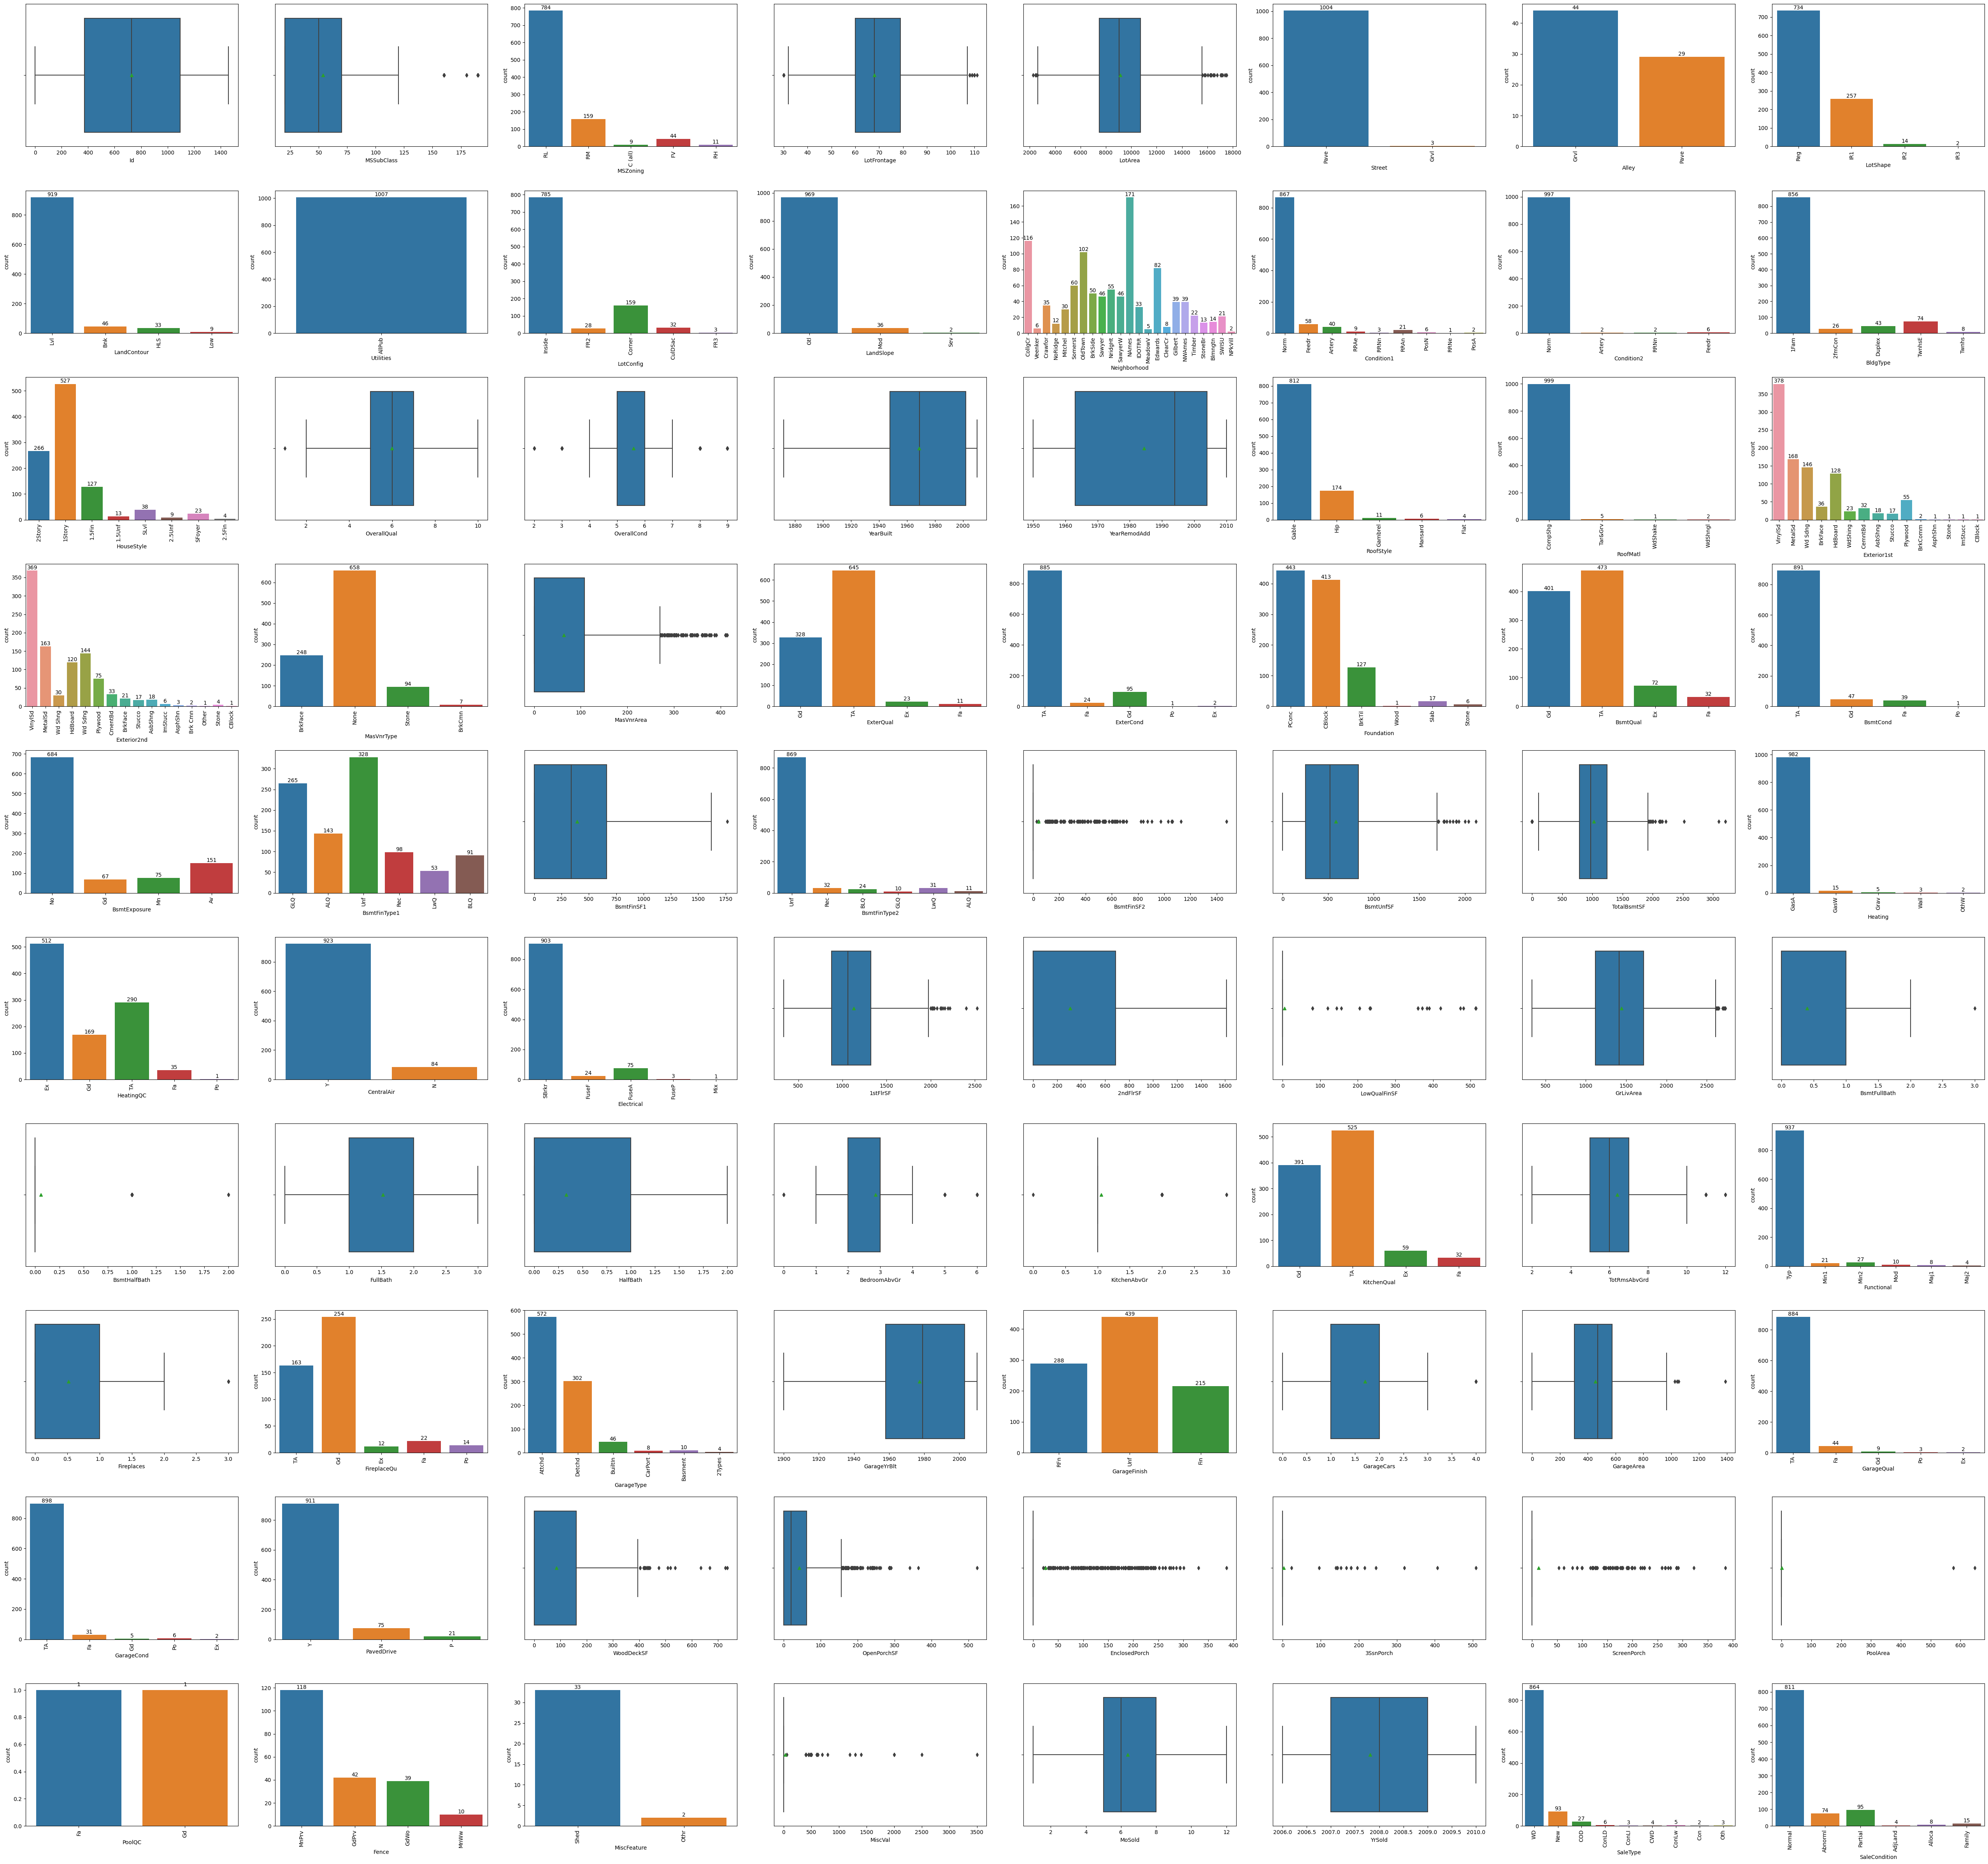

In [9]:
fp.plot_features(data=cleaned_df, plot_type='boxplot', showmeans=True)

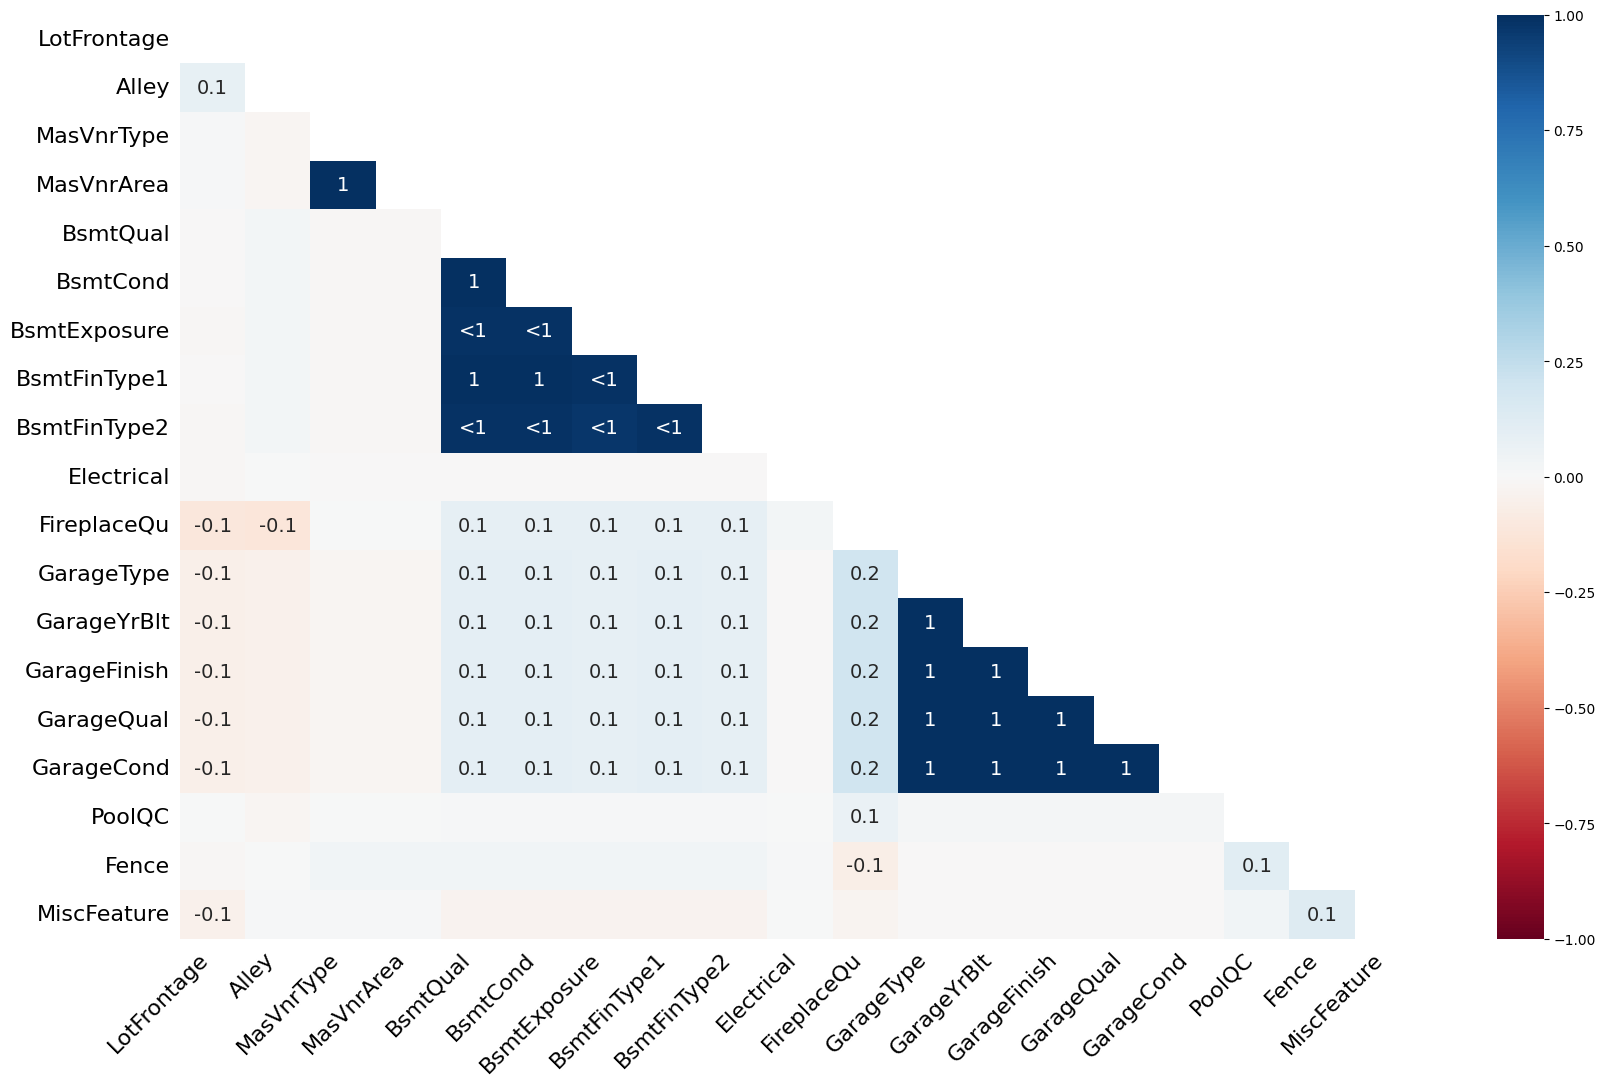

In [10]:
mp.missing_plot('heatmap')

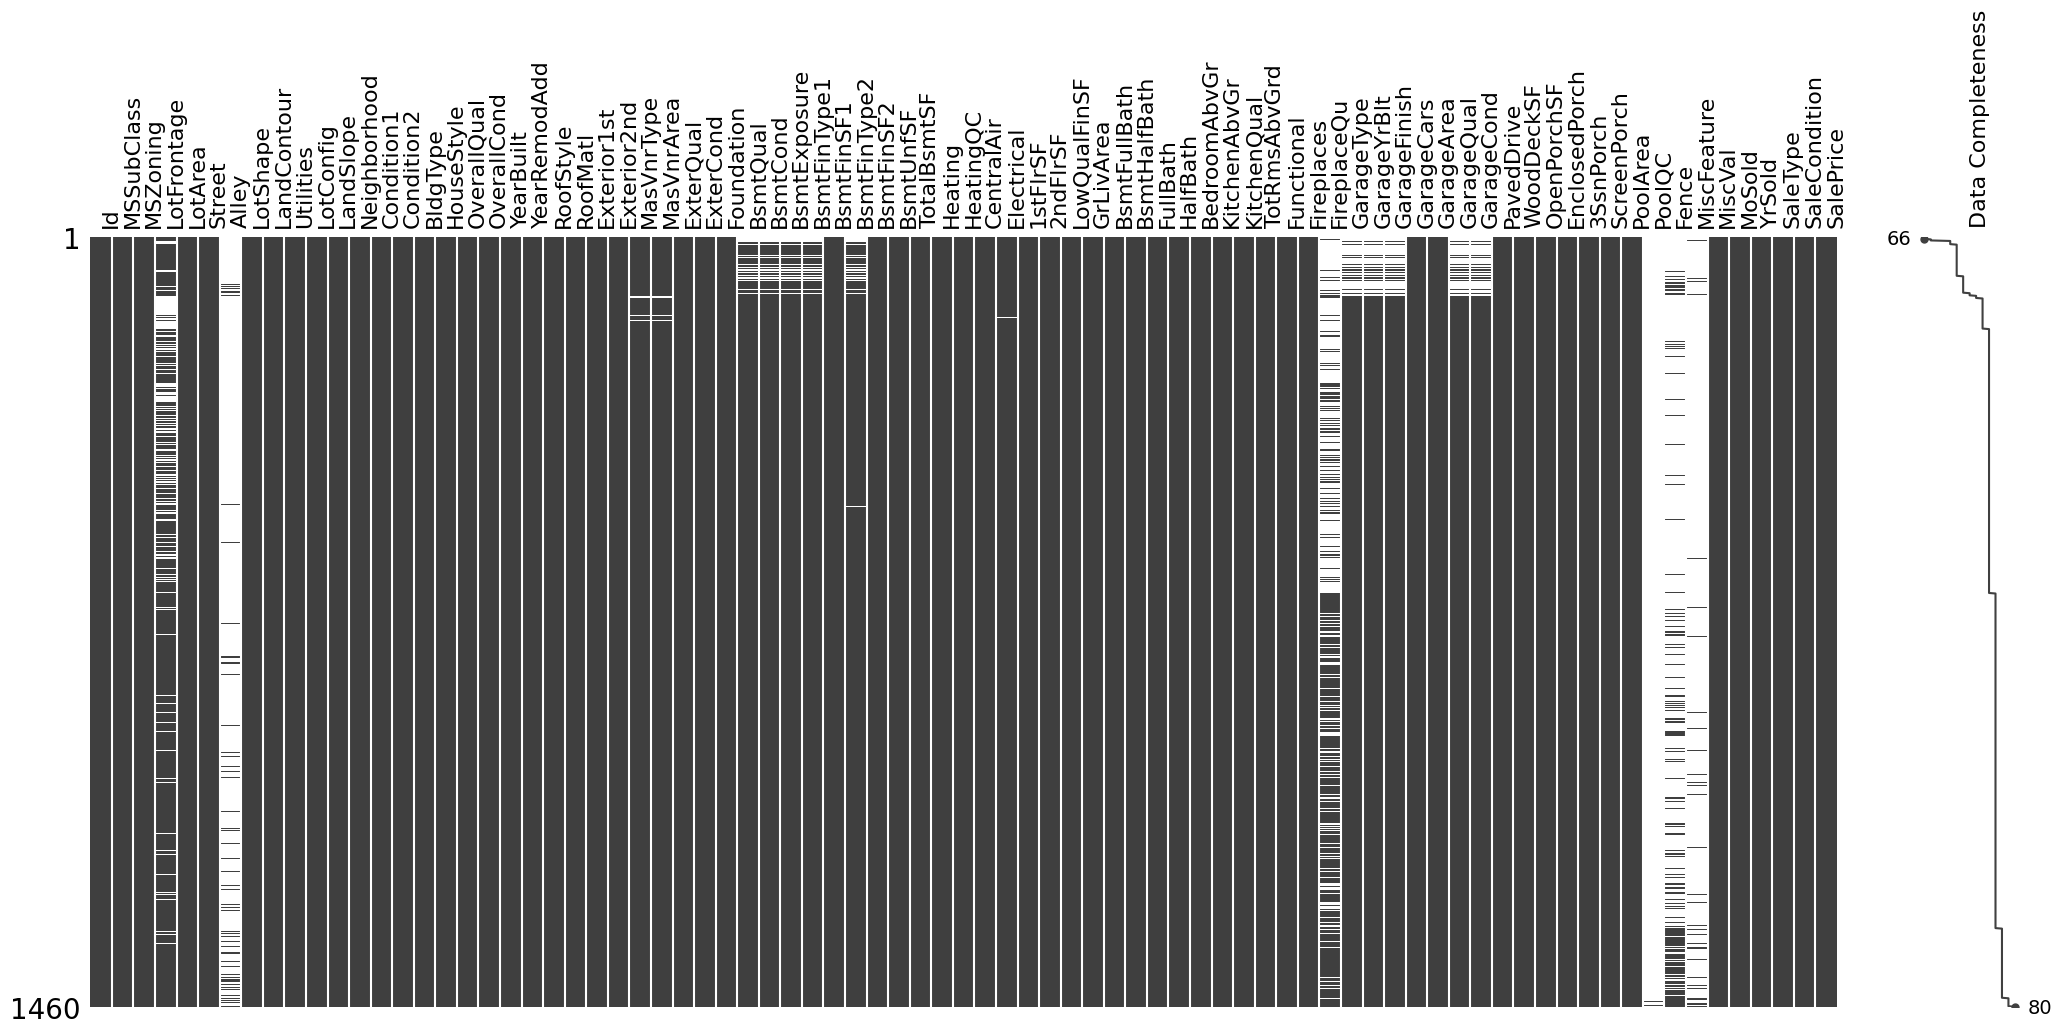

In [11]:
mp.missing_plot('matrix', sort='ascending', label_rotation=90, labels=True)

In [12]:
mp.plot_missing_data()

<Figure size 640x480 with 0 Axes>

In [13]:
# memasukkan kolom yang mar ke dalam variabel agar mudah dibaca
get_prob_MAR_total_bsmtSF =  train_df.iloc[1, [30, 31, 32, 33, 35]].index.to_list() + ['TotalBsmtSF'] # columns related to -> Total BsmtSF,
get_prob_MAR_garage_cars = train_df.iloc[1, [58, 59, 60, 63, 64]].index.to_list() + ['GarageCars'] # columns related to  -> Garage Cars, Garage Area
get_prob_MAR_fireplaceQu = train_df.iloc[1, [57]].index.to_list() + ['Fireplaces'] # columns related to  -> Fireplaces

print(get_prob_MAR_total_bsmtSF)
print(get_prob_MAR_garage_cars)
print(get_prob_MAR_fireplaceQu)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF']
['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars']
['FireplaceQu', 'Fireplaces']


In [14]:
target_col = 'SalePrice'
target_isolate_col = 'BsmtQual'
get_isolated_columns = get_prob_MAR_total_bsmtSF

missing_values = train_df[train_df[target_isolate_col].isna()]
complete_values = train_df[~train_df[target_isolate_col].isna()]

display(missing_values.describe(include='all')[get_isolated_columns + [target_col]])
display(complete_values.describe(include='all')[get_isolated_columns + [target_col]])

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF  \
count         0        0            0            0            0         37.0   
unique        0        0            0            0            0          NaN   
top         NaN      NaN          NaN          NaN          NaN          NaN   
freq        NaN      NaN          NaN          NaN          NaN          NaN   
mean        NaN      NaN          NaN          NaN          NaN          0.0   
std         NaN      NaN          NaN          NaN          NaN          0.0   
min         NaN      NaN          NaN          NaN          NaN          0.0   
25%         NaN      NaN          NaN          NaN          NaN          0.0   
50%         NaN      NaN          NaN          NaN          NaN          0.0   
75%         NaN      NaN          NaN          NaN          NaN          0.0   
max         NaN      NaN          NaN          NaN          NaN          0.0   

            SalePrice  
count       37.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean    105652.891892  
std      29278.694797  
min      39300.000000  
25%      90000.000000  
50%     101800.000000  
75%     118858.000000  
max     198500.000000

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF  \
count      1423     1423         1422         1423         1422  1423.000000   
unique        4        4            4            6            6          NaN   
top          TA       TA           No          Unf          Unf          NaN   
freq        649     1311          953          430         1256          NaN   
mean        NaN      NaN          NaN          NaN          NaN  1084.924104   
std         NaN      NaN          NaN          NaN          NaN   409.413709   
min         NaN      NaN          NaN          NaN          NaN   105.000000   
25%         NaN      NaN          NaN          NaN          NaN   810.500000   
50%         NaN      NaN          NaN          NaN          NaN  1004.000000   
75%         NaN      NaN          NaN          NaN          NaN  1309.500000   
max         NaN      NaN          NaN          NaN          NaN  6110.000000   

            SalePrice  
count     1423.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean    182878.277583  
std      79387.526888  
min      34900.000000  
25%     131750.000000  
50%     165000.000000  
75%     215000.000000  
max     755000.000000

In [15]:
target_drop_col = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']
copy_df = data_imputer.drop_cols(dataframe=cleaned_df, columns_to_drop=target_drop_col)
copy_df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1455     1Fam     2Story            6            5       1999          2000   
1456     1Fam     1Story            6            6       1978          1988   
1457     1Fam     2Story            7            9       1941          2006   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1        Gable  CompShg     MetalSd     MetalSd       None         0.0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
1455     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1456     Gable  CompShg     Plywood     Plywood      Stone       119.0   
1457     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1458       Hip  CompShg     MetalSd     MetalSd       None         0.0   
1459     Gable  CompShg     HdBoard     HdBoard       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd         

sebelum membuat dummy variabel atau ohe, pastikan nilai unique dari test dan train itu harus sama jika tidak maka akan ada perbedaan dimensi dan ini akan berpengaruh saat training model

In [16]:
get_unique_train = sa.table_diagnose(data=train_df, show_dims=False)[['columns', 'types', 'n unique']]
get_unique_train = get_unique_train[get_unique_train['types'] == 'object']

get_unique_cleaned = sa.table_diagnose(data=copy_df, show_dims=False)[['columns', 'types', 'n unique']]
get_unique_cleaned = get_unique_cleaned[get_unique_cleaned['types'] == 'object']

get_unique_test = sa.table_diagnose(data=test_df, show_dims=False)[['columns', 'types', 'n unique']]
get_unique_test = get_unique_test[get_unique_test['types'] == 'object']

display(get_unique_cleaned[['columns', 'n unique']].T)
display(get_unique_train[['columns', 'n unique']].T)
display(get_unique_test[['columns', 'n unique']].T)

1       4         5            6          7          8   \
columns   MSZoning  Street  LotShape  LandContour  Utilities  LotConfig   
n unique         5       2         4            4          1          5   

                 9             10          11          12        13  \
columns   LandSlope  Neighborhood  Condition1  Condition2  BldgType   
n unique          3            23           9           4         5   

                  14         19        20           21           22  \
columns   HouseStyle  RoofStyle  RoofMatl  Exterior1st  Exterior2nd   
n unique           8          5         4           15           16   

                  23         25         26          27        28        29  \
columns   MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond   
n unique           4          4          5           6         4         4   

                    30            31            33       37         38  \
columns   BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC   
n unique             4             6             6        5          5   

                  39          40           51          53           55  \
columns   CentralAir  Electrical  KitchenQual  Functional  FireplaceQu   
n unique           2           5            4           6            5   

                  56            58          61          62          63  \
columns   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive   
n unique           6             3           5           5           3   

                73             74  
columns   SaleType  SaleCondition  
n unique         9              6

2       5      6         7            8          9   \
columns   MSZoning  Street  Alley  LotShape  LandContour  Utilities   
n unique         5       2      2         4            4          2   

                 10         11            12          13          14  \
columns   LotConfig  LandSlope  Neighborhood  Condition1  Condition2   
n unique          5          3            25           9           8   

                15          16         21        22           23           24  \
columns   BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  Exterior2nd   
n unique         5           8          6         8           15           16   

                  25         27         28          29        30        31  \
columns   MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond   
n unique           4          4          5           6         4         4   

                    32            33            35       39         40  \
columns   BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC   
n unique             4             6             6        6          5   

                  41          42           53          55           57  \
columns   CentralAir  Electrical  KitchenQual  Functional  FireplaceQu   
n unique           2           5            4           7            5   

                  58            60          63          64          65  \
columns   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive   
n unique           6             3           5           5           3   

              72     73           74        78             79  
columns   PoolQC  Fence  MiscFeature  SaleType  SaleCondition  
n unique       3      4            4         9              6

2       5      6         7            8          9   \
columns   MSZoning  Street  Alley  LotShape  LandContour  Utilities   
n unique         5       2      2         4            4          1   

                 10         11            12          13          14  \
columns   LotConfig  LandSlope  Neighborhood  Condition1  Condition2   
n unique          5          3            25           9           5   

                15          16         21        22           23           24  \
columns   BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  Exterior2nd   
n unique         5           7          6         4           13           15   

                  25         27         28          29        30        31  \
columns   MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond   
n unique           4          4          5           6         4         4   

                    32            33            35       39         40  \
columns   BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC   
n unique             4             6             6        4          5   

                  41          42           53          55           57  \
columns   CentralAir  Electrical  KitchenQual  Functional  FireplaceQu   
n unique           2           4            4           7            5   

                  58            60          63          64          65  \
columns   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive   
n unique           6             3           4           5           3   

              72     73           74        78             79  
columns   PoolQC  Fence  MiscFeature  SaleType  SaleCondition  
n unique       2      4            3         9              6

menentukan kolom mana saya yang diubah kedalam ordinal dan kolom mana saja yang diubah ke ohe, cari chisquared antara fitur kategori dengan target, gunakan class statanalyzer

In [17]:
columns_dummies_variable = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType']
columns_ordinal = ['Utilities', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

copy_df.groupby('GarageQual')['SalePrice'].agg(['mean', 'std', 'count']).sort_values('mean')
# display(copy_df[columns_dummies_variable].nunique())
# display(test_df[columns_dummies_variable].nunique())

mean           std  count
GarageQual                                    
Po          100166.666667  35143.752408      3
Fa          118170.931818  35546.008999     44
Ex          124000.000000   4949.747468      2
TA          178048.202489  66329.561371    884
Gd          180483.333333  66016.891778      9

In [18]:
imputed_df = data_imputer.map_and_impute(copy_df, columns_ordinal, columns_dummies_variable, 'SalePrice', 123, 10, 'mean')
display(imputed_df)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0           60.0       3.0         65.0   8450.0     1.0       0.0   
1           20.0       3.0         80.0   9600.0     1.0       0.0   
2           60.0       3.0         68.0  11250.0     1.0       3.0   
3           70.0       3.0         60.0   9550.0     1.0       3.0   
4           60.0       3.0         84.0  14260.0     1.0       3.0   
...          ...       ...          ...      ...     ...       ...   
1002        60.0       3.0         62.0   7917.0     1.0       0.0   
1003        20.0       3.0         85.0  13175.0     1.0       0.0   
1004        70.0       3.0         66.0   9042.0     1.0       0.0   
1005        20.0       3.0         68.0   9717.0     1.0       0.0   
1006        20.0       3.0         75.0   9937.0     1.0       0.0   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0             2.0        0.0        1.0        1.0          14.0         4.0   
1             2.0        0.0        3.0        1.0          18.0         2.0   
2             2.0        0.0        1.0        1.0          14.0         4.0   
3             2.0        0.0        0.0        1.0          16.0         4.0   
4             2.0        0.0        3.0        1.0          20.0         4.0   
...           ...        ...        ...        ...           ...         ...   
1002          2.0        0.0        1.0        1.0          13.0         4.0   
1003          2.0        0.0        1.0        1.0          11.0         4.0   
1004          2.0        0.0        1.0        1.0          16.0         4.0   
1005          2.0        0.0        1.0        1.0           8.0         4.0   
1006          2.0        0.0        1.0        1.0           3.0         4.0   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0            3.0       2.0         7.0          7.0          5.0     2003.0   
1            3.0       2.0         6.0          6.0          8.0     1976.0   
2            3.0       2.0         7.0          7.0          5.0     2001.0   
3            3.0       2.0         7.0          7.0          5.0     1915.0   
4            3.0       2.0         7.0          8.0          5.0     2000.0   
...          ...       ...         ...          ...          ...        ...   
1002         3.0       2.0         7.0          6.0          5.0     1999.0   
1003         3.0       2.0         6.0          6.0          6.0     1978.0   
1004         3.0       2.0         7.0          7.0          9.0     1941.0   
1005         3.0       2.0         6.0          5.0          6.0     1950.0   
1006         3.0       2.0         6.0          5.0          6.0     1965.0   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0           2003.0        2.0       1.0         11.0         13.0         2.0   
1           1976.0        2.0       1.0          5.0          7.0         1.0   
2           2002.0        2.0       1.0         11.0         13.0         2.0   
3           1970.0        2.0       1.0          4.0          6.0         1.0   
4           2000.0        2.0       1.0         11.0         13.0         2.0   
...            ...        ...       ...          ...          ...         ...   
1002        2000.0        2.0       1.0         11.0         13.0         1.0   
1003        1988.0        2.0       1.0          9.0          9.0         3.0   
1004        2006.0        2.0       1.0         13.0         14.0         1.0   
1005        1996.0        4.0       1.0          5.0          7.0         1.0   
1006        1965.0        2.0       1.0          8.0         10.0         1.0   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0          196.0        2.0        4.0         5.0       3.0       3.0   
1            0.0        1.0        4.0         2.0       3.0       3.0   
2          162.0        2.0        4.0         5.0       3.0

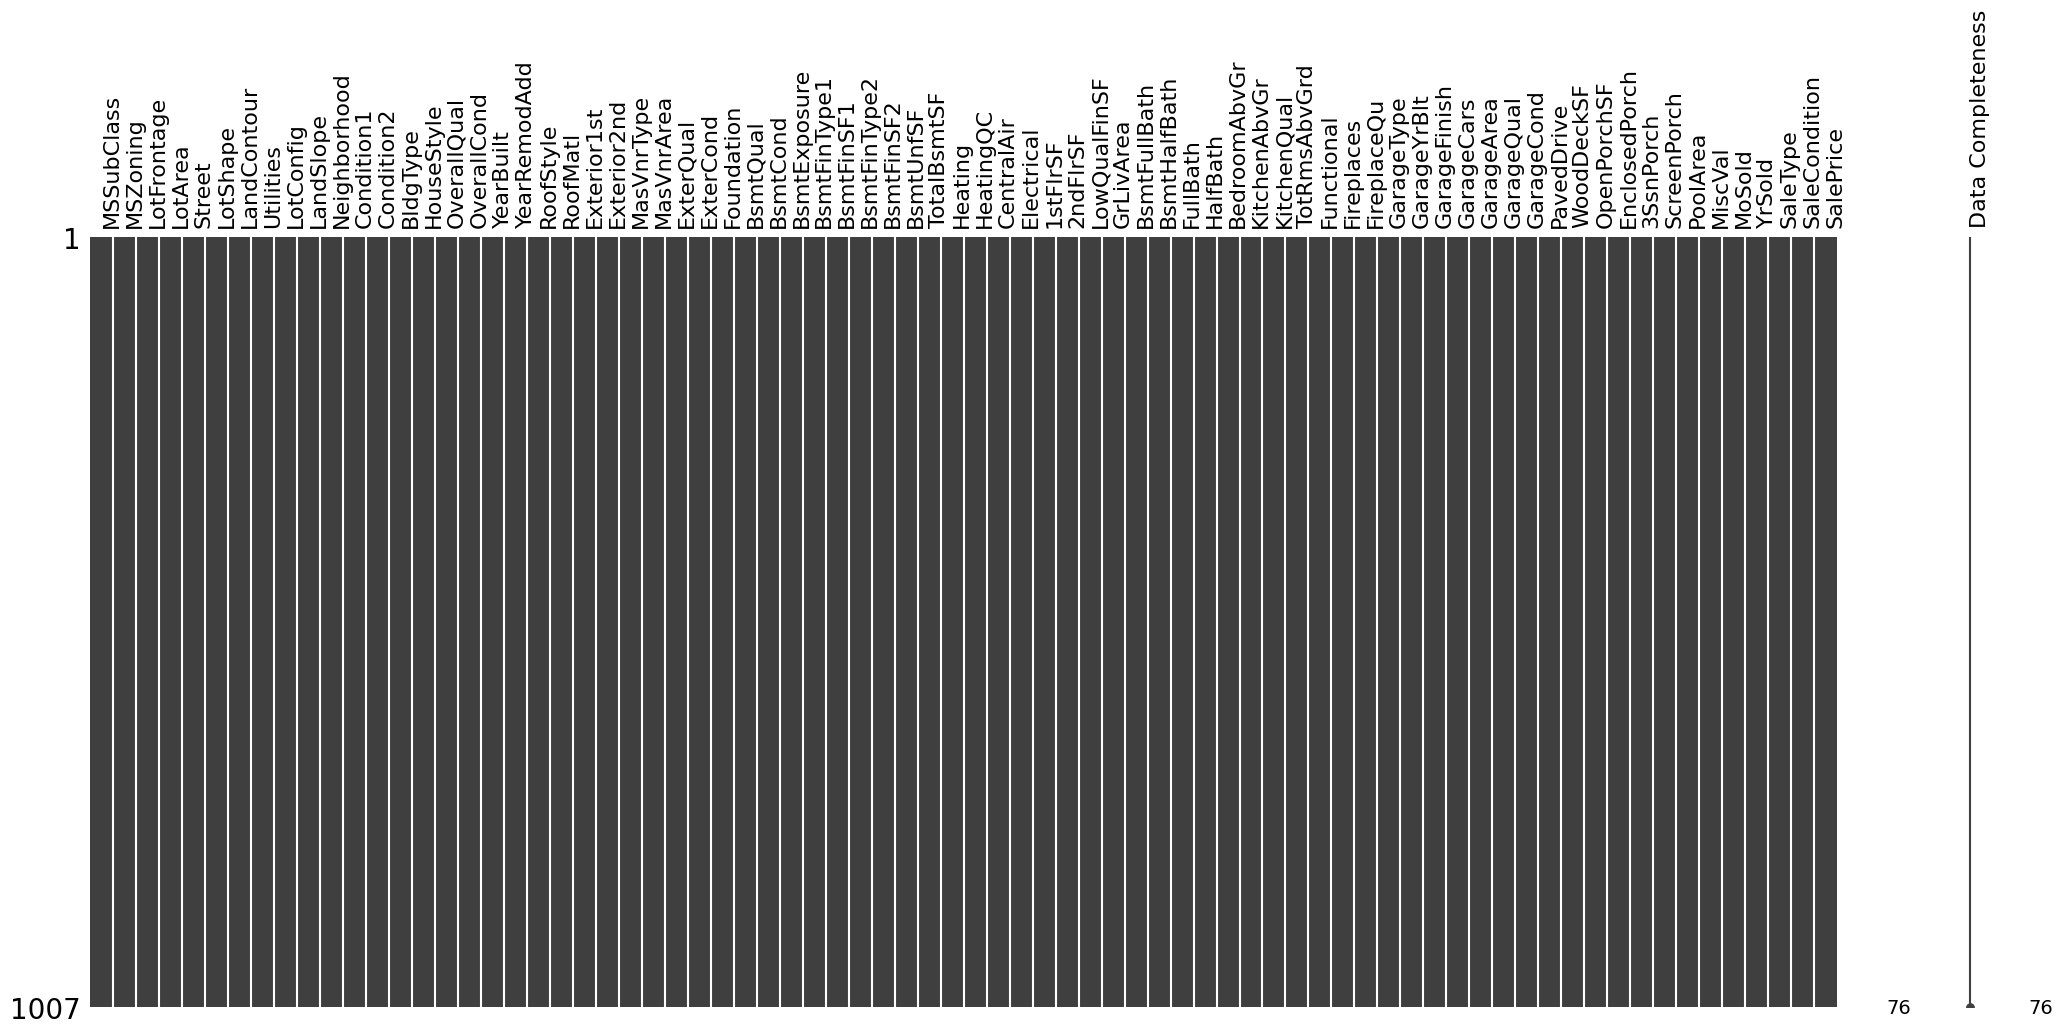

In [19]:
mp.missing_plot(data=imputed_df, plot_type='matrix', sort='ascending', labels=True, label_rotation=90)

In [20]:
get_weak_corr = sa.concatinated_df(data=imputed_df)
# display(get_weak_corr)

get_weak_corr_cols = get_weak_corr[(get_weak_corr['F'] < 0.2) & (get_weak_corr['p_value'] > 0.05)].index
new_df = data_imputer.drop_cols(dataframe=imputed_df, columns_to_drop=get_weak_corr_cols)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [21]:
# fixed_df = data_imputer.create_dummies(new_df, columns=columns_dummies_variable)
# fixed_df

In [22]:
sa.table_diagnose(new_df)

Rows  Columns  Numeric  Object
Count  1007       67       67       0

columns n null n unique    types  \
0        MSZoning      0        5  float64   
1     LotFrontage      0       80  float64   
2         LotArea      0      710  float64   
3        LotShape      0        4  float64   
4     LandContour      0        4  float64   
5       Utilities      0        1  float64   
6       LotConfig      0        5  float64   
7    Neighborhood      0       23  float64   
8      Condition1      0        9  float64   
9      Condition2      0        4  float64   
10       BldgType      0        5  float64   
11     HouseStyle      0        8  float64   
12    OverallQual      0       10  float64   
13    OverallCond      0        8  float64   
14      YearBuilt      0      110  float64   
15   YearRemodAdd      0       61  float64   
16      RoofStyle      0        5  float64   
17    Exterior1st      0       15  float64   
18    Exterior2nd      0       16  float64   
19     MasVnrType      0        4  float64   
20     MasVnrArea      0      193  float64   
21      ExterQual      0        4  float64   
22      ExterCond      0        5  float64   
23     Foundation      0        6  float64   
24       BsmtQual      0        5  float64   
25       BsmtCond      0        5  float64   
26   BsmtExposure      0        5  float64   
27   BsmtFinType1      0        7  float64   
28     BsmtFinSF1      0      452  float64   
29   BsmtFinType2      0        7  float64   
30      BsmtUnfSF      0      620  float64   
31    TotalBsmtSF      0      550  float64   
32        Heating      0        5  float64   
33      HeatingQC      0        5  float64   
34     CentralAir      0        2  float64   
35     Electrical      0        6  float64   
36       1stFlrSF      0      595  float64   
37       2ndFlrSF      0      303  float64   
38   LowQualFinSF      0       17  float64   
39      GrLivArea      0      655  float64   
40   BsmtFullBath      0        4  float64   
41       FullBath      0        4  float64   
42       HalfBath      0        3  float64   
43   BedroomAbvGr      0        7  float64   
44   KitchenAbvGr      0        4  float64   
45    KitchenQual      0        4  float64   
46   TotRmsAbvGrd      0       11  float64   
47     Functional      0        6  float64   
48     Fireplaces      0        4  float64   
49    FireplaceQu      0        6  float64   
50     GarageType      0        7  float64   
51    GarageYrBlt      0      159  float64   
52   GarageFinish      0        4  float64   
53     GarageCars      0        5  float64   
54     GarageArea      0      347  float64   
55     GarageQual      0        6  float64   
56     GarageCond      0        6  float64   
57     PavedDrive      0        3  float64   
58     WoodDeckSF      0      203  float64   
59    OpenPorchSF      0      159  float64   
60  EnclosedPorch      0      105  float64   
61    ScreenPorch      0       49  float64   
62        MiscVal      0       16  float64   
63         MoSold      0       12  float64   
64       SaleType      0        9  float64   
65  SaleCondition      0        6  float64   
66      SalePrice      0      521  float64   

                                      unique vals percentages null (%)  \
0                       [3.0, 2.0, 0.0, 4.0, 1.0]                  0.0   
1                                             NaN                  0.0   
2                                             NaN                  0.0   
3                            [0.0, 3.0, 2.0, 1.0]                  0.0   
4                            [2.0, 0.0, 3.0, 1.0]                  0.0   
5                                           [0.0]                  0.0   
6                       [1.0, 3.0, 0.0, 4.0, 2.0]                  0.0   
7                                             NaN                  0.0   
8   [4.0, 2.0, 0.0, 1.0, 6.0, 3.0, 5.0, 7.0, 8.0]                  0.0   
9                            [3.0, 1.0, 0.0, 2.0]                  0.0   
10                      [2.0, 0.0, 1.0, 4.0, 3.0]                  

In [23]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from sklearn.model_selection import GridSearchCV
import keras_tuner as kt

print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

2023-07-31 18:03:48.648924: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 18:03:48.684902: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 18:03:48.685164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 18:03:49.893577: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow v2.12.0
TensorFlow Decision Forests v1.3.0


In [24]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(new_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

827 examples in training, 180 examples in testing.


In [25]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [26]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [27]:
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - SS_res/(SS_tot + K.epsilon())

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [28]:
# model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
model = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1", task = tfdf.keras.Task.REGRESSION)
# # model = tfdf.keras.CartModel(task = tfdf.keras.Task.REGRESSION)

model.compile(metrics=["mse", "mae", r_squared, rmse]) # Optional, you can use this to include a list of eval metrics
model.fit(train_ds)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp7g9sg0fd as temporary training directory
Reading training dataset...


[WARNING 23-07-31 18:03:50.7767 WIB gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-07-31 18:03:50.7767 WIB gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-07-31 18:03:50.7767 WIB gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
2023-07-31 18:03:50.814344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_40' with dtype double and shape [827]
	 [[{{node Placeholder/_40}}]]


Training dataset read in 0:00:03.390172. Found 827 examples.
Training model...
Model trained in 0:00:00.833074
Compiling model...


[INFO 23-07-31 18:03:55.0142 WIB kernel.cc:1242] Loading model from path /tmp/tmp7g9sg0fd/model/ with prefix 547daf0ba75e40de
[INFO 23-07-31 18:03:55.0220 WIB decision_forest.cc:660] Model loaded with 67 root(s), 3263 node(s), and 66 input feature(s).
[INFO 23-07-31 18:03:55.0221 WIB abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 23-07-31 18:03:55.0221 WIB kernel.cc:1074] Use fast generic engine
2023-07-31 18:03:55.038785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_58' with dtype double and shape [827]
	 [[{{node Placeholder/_58}}]]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [29]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

inspector = model.make_inspector()
inspector.evaluation()

evaluation = model.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2023-07-31 18:03:56.417377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_57' with dtype double and shape [180]
	 [[{{node Placeholder/_57}}]]


1/1 [==============================] - 0s 465ms/step - loss: 0.0000e+00 - mse: 491521312.0000 - mae: 14687.4053 - r_squared: 0.9003 - rmse: 22170.2793
loss: 0.0000
mse: 491521312.0000
mae: 14687.4053
r_squared: 0.9003
rmse: 22170.2793


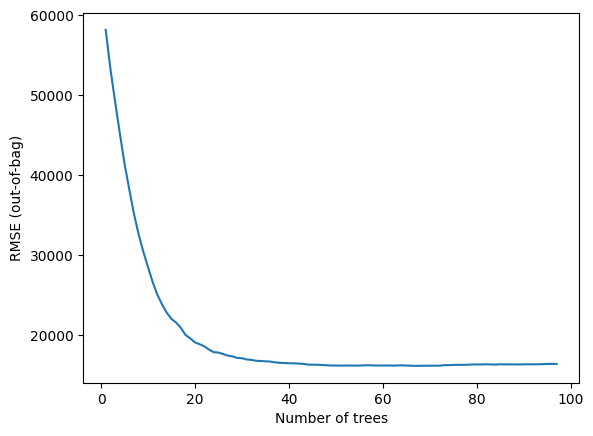

In [30]:
import matplotlib.pyplot as plt
logs = model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [31]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

X_train = new_df.drop(columns=['SalePrice'])
y_train = new_df['SalePrice']

# X_scaled = scaler.fit_transform(X)
# X = pd.DataFrame(X_scaled, columns=X.columns)

display(X_train.shape)
display(y_train.shape)

(1007, 66)

(1007,)

In [32]:
get_dict = data_imputer.my_dict.copy()
new_test_df = test_df[X_train.columns]

transformed_test_df = new_test_df.replace(get_dict)

In [33]:
get_obj_df = transformed_test_df.select_dtypes(include='object')
sa.table_diagnose(get_obj_df)

Rows  Columns  Numeric  Object
Count  1459        4        0       4

columns n null n unique   types                   unique vals  \
0  Neighborhood      0       25  object                           NaN   
1    Condition2      0        5  object         [3, 2, PosA, PosN, 1]   
2     RoofStyle      0        6  object         [2, 4, 0, 1, 3, Shed]   
3    Functional      2        7  object  [5, 2, 3, 1, 4, Sev, 0, nan]   

  percentages null (%)  std  min   Q1 mean meadian (Q2)   Q3  max  \
0                  0.0  NaN  NaN  NaN  NaN          NaN  NaN  NaN   
1                  0.0  NaN  NaN  NaN  NaN          NaN  NaN  NaN   
2                  0.0  NaN  NaN  NaN  NaN          NaN  NaN  NaN   
3              0.13708  NaN  NaN  NaN  NaN          NaN  NaN  NaN   

  IQR (< lower) IQR (> upper)  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN

In [34]:
for col in get_obj_df.columns:
  index = len(get_dict[col])  
  for val in get_obj_df[col].unique():
    if type(val) == str:
      get_obj_df[col] = get_obj_df[col].replace({val:index})
      index += 1

In [35]:
transformed_test_df[get_obj_df.columns] = get_obj_df

In [36]:
sa.table_diagnose(transformed_test_df)

Rows  Columns  Numeric  Object
Count  1459       66       66       0

columns n null n unique    types  \
0        MSZoning      4        5  float64   
1     LotFrontage    227      115  float64   
2         LotArea      0     1106    int64   
3        LotShape      0        4    int64   
4     LandContour      0        4    int64   
5       Utilities      2        1  float64   
6       LotConfig      0        5    int64   
7    Neighborhood      0       25    int64   
8      Condition1      0        9    int64   
9      Condition2      0        5    int64   
10       BldgType      0        5    int64   
11     HouseStyle      0        7    int64   
12    OverallQual      0       10    int64   
13    OverallCond      0        9    int64   
14      YearBuilt      0      106    int64   
15   YearRemodAdd      0       61    int64   
16      RoofStyle      0        6    int64   
17    Exterior1st      1       13  float64   
18    Exterior2nd      1       15  float64   
19     MasVnrType     16        4  float64   
20     MasVnrArea     15      303  float64   
21      ExterQual      0        4    int64   
22      ExterCond      0        5    int64   
23     Foundation      0        6    int64   
24       BsmtQual      0        5    int64   
25       BsmtCond      0        5    int64   
26   BsmtExposure      0        5    int64   
27   BsmtFinType1      0        7    int64   
28     BsmtFinSF1      1      669  float64   
29   BsmtFinType2      0        7    int64   
30      BsmtUnfSF      1      793  float64   
31    TotalBsmtSF      1      736  float64   
32        Heating      0        4    int64   
33      HeatingQC      0        5    int64   
34     CentralAir      0        2    int64   
35     Electrical      0        4    int64   
36       1stFlrSF      0      789    int64   
37       2ndFlrSF      0      407    int64   
38   LowQualFinSF      0       15    int64   
39      GrLivArea      0      879    int64   
40   BsmtFullBath      2        4  float64   
41       FullBath      0        5    int64   
42       HalfBath      0        3    int64   
43   BedroomAbvGr      0        7    int64   
44   KitchenAbvGr      0        3    int64   
45    KitchenQual      1        4  float64   
46   TotRmsAbvGrd      0       12    int64   
47     Functional      2        7  float64   
48     Fireplaces      0        5    int64   
49    FireplaceQu      0        6    int64   
50     GarageType      0        7    int64   
51    GarageYrBlt     78       97  float64   
52   GarageFinish      0        4    int64   
53     GarageCars      1        6  float64   
54     GarageArea      1      459  float64   
55     GarageQual      0        5    int64   
56     GarageCond      0        6    int64   
57     PavedDrive      0        3    int64   
58     WoodDeckSF      0      263    int64   
59    OpenPorchSF      0      203    int64   
60  EnclosedPorch      0      131    int64   
61    ScreenPorch      0       75    int64   
62        MiscVal      0       26    int64   
63         MoSold      0       12    int64   
64       SaleType      1        9  float64   
65  SaleCondition      0        6    int64   

                                          unique vals percentages null (%)  \
0                      [1.0, 3.0, 2.0, 4.0, 0.0, nan]              0.27416   
1                                                 NaN            15.558602   
2                                                 NaN                  0.0   
3                                        [0, 3, 2, 1]                  0.0   
4                                        [2, 3, 0, 1]                  0.0   
5                                          [0.0, nan]              0.13708   
6                                     [1, 0, 3, 4, 2]                  0.0   
7                                                 NaN                  0.0   
8                         [2, 4, 5, 7, 0, 6, 8, 3, 1]                  0.0   
9                                     [3, 2, 4, 5, 1]                  0.0   
10                                    [2, 4, 3, 1, 0]                

In [37]:
imputer = IterativeImputer(max_iter=10, initial_strategy='mean')
# fit and transform the dataframe values and convert them back to a dataframe
imputed_test_df = pd.DataFrame(imputer.fit_transform(transformed_test_df), columns=transformed_test_df.columns)
# return the imputed dataframe

In [38]:
sa.table_diagnose(imputed_test_df)

Rows  Columns  Numeric  Object
Count  1459       66       66       0

columns n null n unique    types  \
0        MSZoning      0        9  float64   
1     LotFrontage      0      342  float64   
2         LotArea      0     1106  float64   
3        LotShape      0        4  float64   
4     LandContour      0        4  float64   
5       Utilities      0        1  float64   
6       LotConfig      0        5  float64   
7    Neighborhood      0       25  float64   
8      Condition1      0        9  float64   
9      Condition2      0        5  float64   
10       BldgType      0        5  float64   
11     HouseStyle      0        7  float64   
12    OverallQual      0       10  float64   
13    OverallCond      0        9  float64   
14      YearBuilt      0      106  float64   
15   YearRemodAdd      0       61  float64   
16      RoofStyle      0        6  float64   
17    Exterior1st      0       14  float64   
18    Exterior2nd      0       16  float64   
19     MasVnrType      0       20  float64   
20     MasVnrArea      0      318  float64   
21      ExterQual      0        4  float64   
22      ExterCond      0        5  float64   
23     Foundation      0        6  float64   
24       BsmtQual      0        5  float64   
25       BsmtCond      0        5  float64   
26   BsmtExposure      0        5  float64   
27   BsmtFinType1      0        7  float64   
28     BsmtFinSF1      0      670  float64   
29   BsmtFinType2      0        7  float64   
30      BsmtUnfSF      0      794  float64   
31    TotalBsmtSF      0      737  float64   
32        Heating      0        4  float64   
33      HeatingQC      0        5  float64   
34     CentralAir      0        2  float64   
35     Electrical      0        4  float64   
36       1stFlrSF      0      789  float64   
37       2ndFlrSF      0      407  float64   
38   LowQualFinSF      0       15  float64   
39      GrLivArea      0      879  float64   
40   BsmtFullBath      0        6  float64   
41       FullBath      0        5  float64   
42       HalfBath      0        3  float64   
43   BedroomAbvGr      0        7  float64   
44   KitchenAbvGr      0        3  float64   
45    KitchenQual      0        5  float64   
46   TotRmsAbvGrd      0       12  float64   
47     Functional      0        9  float64   
48     Fireplaces      0        5  float64   
49    FireplaceQu      0        6  float64   
50     GarageType      0        7  float64   
51    GarageYrBlt      0      175  float64   
52   GarageFinish      0        4  float64   
53     GarageCars      0        7  float64   
54     GarageArea      0      460  float64   
55     GarageQual      0        5  float64   
56     GarageCond      0        6  float64   
57     PavedDrive      0        3  float64   
58     WoodDeckSF      0      263  float64   
59    OpenPorchSF      0      203  float64   
60  EnclosedPorch      0      131  float64   
61    ScreenPorch      0       75  float64   
62        MiscVal      0       26  float64   
63         MoSold      0       12  float64   
64       SaleType      0       10  float64   
65  SaleCondition      0        6  float64   

                                          unique vals percentages null (%)  \
0   [1.0, 3.0, 2.0, 4.0, 0.0, 2.6930930788064416, ...                  0.0   
1                                                 NaN                  0.0   
2                                                 NaN                  0.0   
3                                [0.0, 3.0, 2.0, 1.0]                  0.0   
4                                [2.0, 3.0, 0.0, 1.0]                  0.0   
5                                               [0.0]                  0.0   
6                           [1.0, 0.0, 3.0, 4.0, 2.0]                  0.0   
7                                                 NaN                  0.0   
8       [2.0, 4.0, 5.0, 7.0, 0.0, 6.0, 8.0, 3.0, 1.0]                  0.0   
9                           [3.0, 2.0, 4.0, 5.0, 1.0]                  0.0   
10                          [2.0, 4.0, 3.0, 1.0, 0.0]                

In [39]:
print(X_train.shape)
print(imputed_test_df.shape)

(1007, 66)
(1459, 66)


In [40]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    imputed_test_df,
    task = tfdf.keras.Task.REGRESSION)

y_pred = model.predict(test_ds)

2/2 [==============================] - 0s 9ms/step


2023-07-31 18:04:01.161950: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_15' with dtype double and shape [1459]
	 [[{{node Placeholder/_15}}]]


In [41]:
y_pred

array([[120671.72 ],
       [160541.6  ],
       [180500.14 ],
       ...,
       [158376.69 ],
       [114676.164],
       [210774.42 ]], dtype=float32)

In [42]:
# Save model predictions to a DataFrame
pred_df = pd.DataFrame(y_pred)

# Import the sample submission (We need the Id column)
sub_df = pd.read_csv('./dataset/sample_submission.csv')


# Concat the predictions DataFrame with the Id column of the sample submission
datasets = pd.concat([sub_df['Id'], pred_df], axis=1)

In [43]:
# Rename the columns
datasets.columns = ['Id', 'SalePrice']
# Save the predictions to csv file, submission.csv
datasets.to_csv('./dataset/my_submission.csv', index=False)